# Data Wrangling and Exploration

This notebook loads the data and explores the reviews by doing word counts and removing stop words

### Define the imports we need

In [19]:
import pandas as pd
import numpy as np
import bz2
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

### Load the review data from the file and pre-process it. 

Define a function that can load a bz2 text file and split them into an array of sentiment, review title and review body.
When loading each review, we need to perform the following
+ Convert all words to lower case, so we are doing not analyzing words with different case as different words
+ Drop any stop words like I, me, this, is ...

In [20]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def to_words(text):
    words = []
    tokens = re.findall('\w+', text)
    for w in tokens:
        w = w.lower()
        if w not in stop_words:
            words.append(w)
    return words

def load_data(txt_bz_file):
    sentiments = []
    review_titles = []
    review_bodys = []
    
    with bz2.open(txt_bz_file, "rt", encoding='utf-8') as bz_file:
        for line in bz_file:
            label, review = line.split(' ', maxsplit=1)
            sentiments.append(int(label[9:]))
            title, body = review.split(':', maxsplit=1)
            
            review_titles.append(to_words(title))
            review_bodys.append(to_words(body))
    return sentiments, review_titles, review_bodys

### Do word count on all negative and positive sentiments on training set

In [22]:
sentiments, titles, reviews = load_data("data/sample_train.ft.txt.bz2")

pos_title_dist = nltk.FreqDist()
neg_title_dist = nltk.FreqDist()

idx = 0
for title in titles:
    for word in title:
        if sentiments[idx] == 2 :
            pos_title_dist[word] += 1
        else:
            neg_title_dist[word] += 1
    idx += 1

pos_review_dist = nltk.FreqDist()
neg_review_dist = nltk.FreqDist()

idx = 0
for review in reviews:
    for word in review:
        if sentiments[idx] == 2 :
            pos_review_dist[word] += 1
        else:
            neg_review_dist[word] += 1
    idx += 1
 

### Plot Sentiment disribution

<BarContainer object of 2 artists>

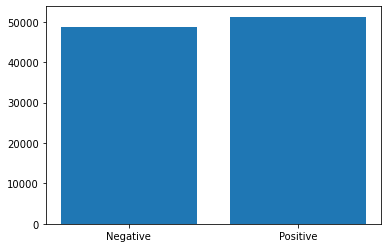

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

senti_counts = np.bincount(np.array(sentiments))
x = ['Negative', 'Positive']
plt.bar(x, height = [senti_counts[1], senti_counts[2]])


### Plot the most common 20 words in positive sentiment titles

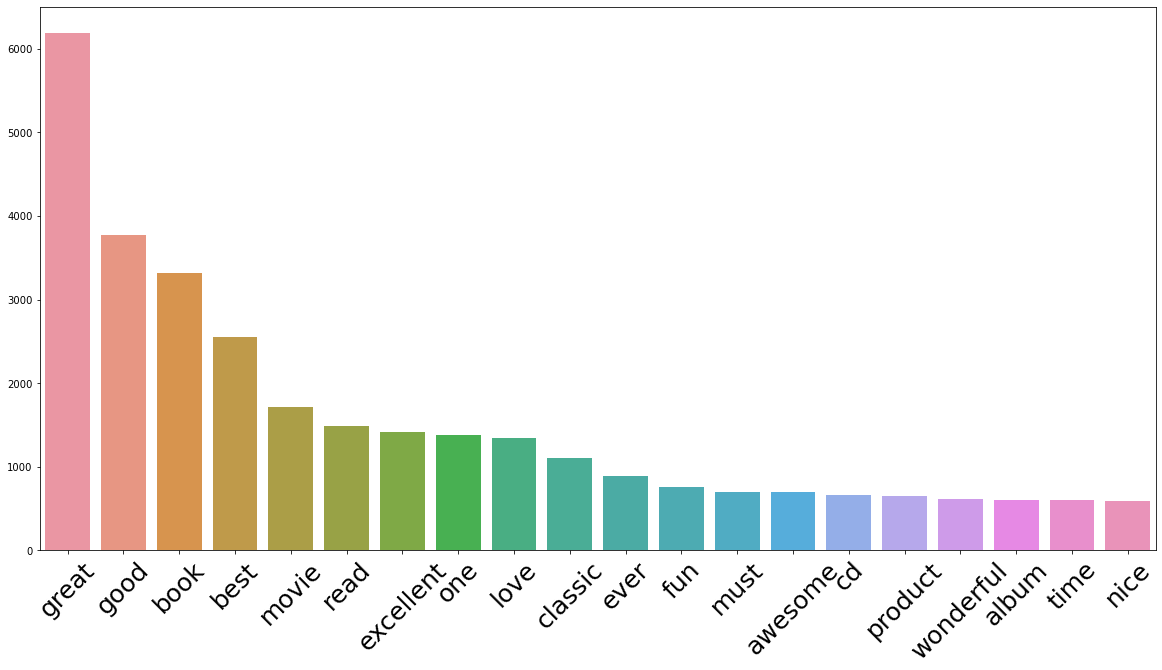

In [27]:
## Get the most common 20 words as a series
pos_title_dist_series = pd.Series(dict(pos_title_dist.most_common(20)))

plt.subplots(figsize=(20,10))
sns.barplot(x=pos_title_dist_series.index, y=pos_title_dist_series.values)
plt.xticks(rotation=45, fontsize=25);

### Plot the most common 20 words in negative sentiment titles

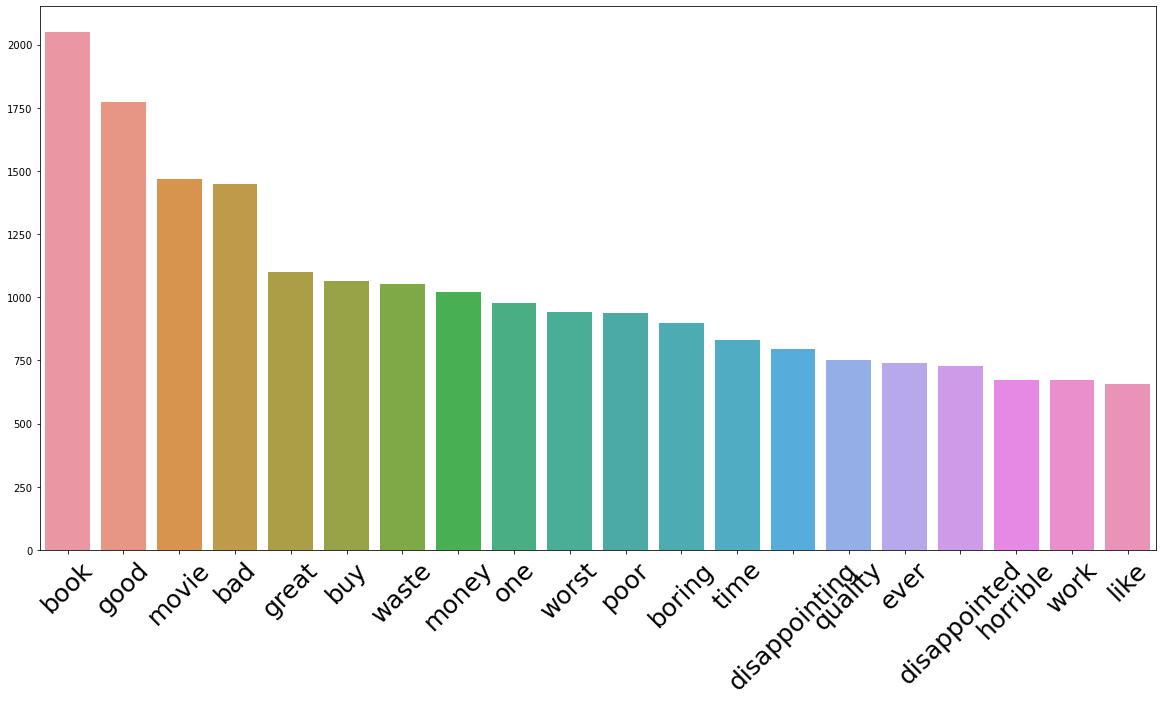

In [28]:
neg_title_dist_series = pd.Series(dict(neg_title_dist.most_common(20)))

plt.subplots(figsize=(20,10))
sns.barplot(x=neg_title_dist_series.index, y=neg_title_dist_series.values)
plt.xticks(rotation=45, fontsize=25);

### Plot the most common 20 words in positive sentiment review

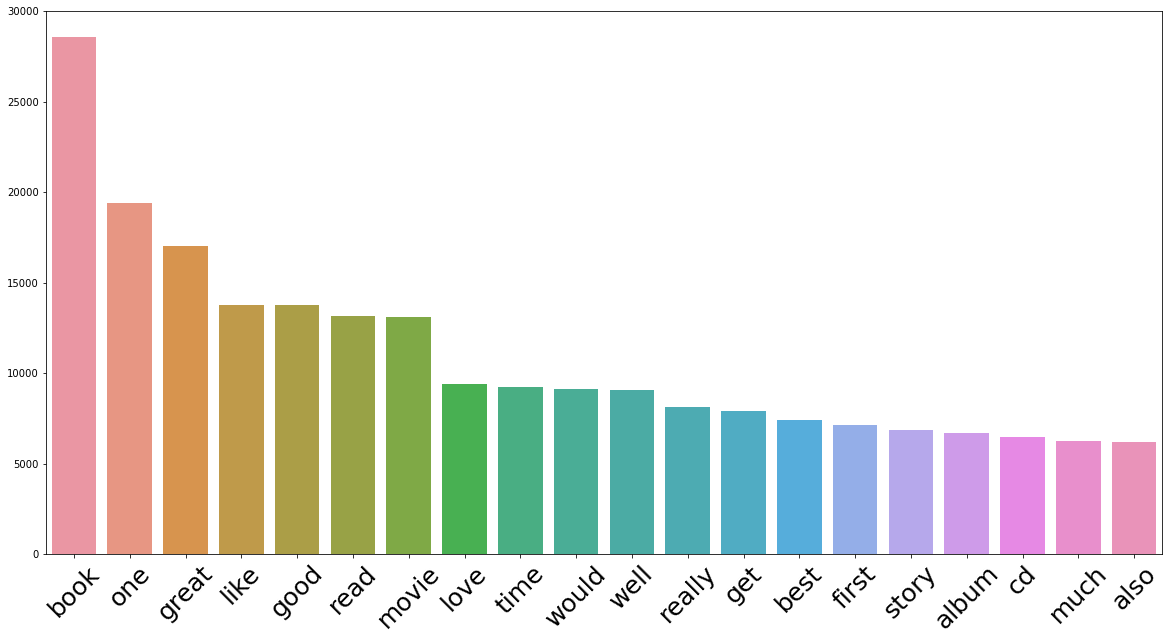

In [52]:
pos_review_dist_series = pd.Series(dict(pos_review_dist.most_common(20)))

plt.subplots(figsize=(20,10))
sns.barplot(x=pos_review_dist_series.index, y=pos_review_dist_series.values)
plt.xticks(rotation=45, fontsize=25);

### Plot the most common 20 words in negative sentiment review

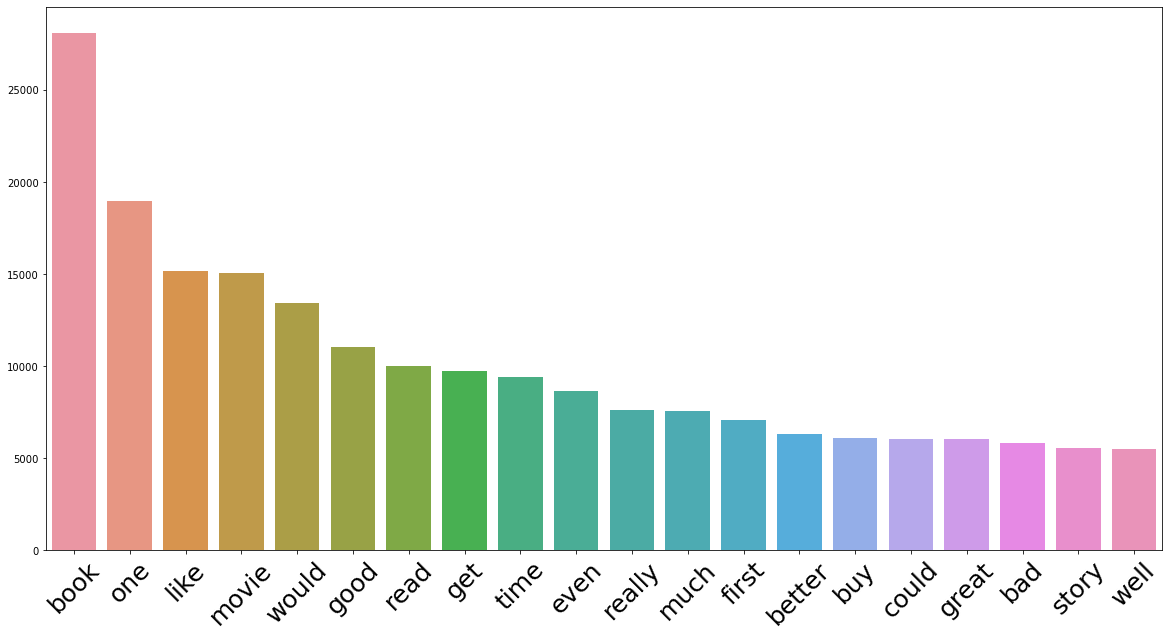

In [53]:
neg_review_dist_series = pd.Series(dict(neg_review_dist.most_common(20)))

plt.subplots(figsize=(20,10))
sns.barplot(x=neg_review_dist_series.index, y=neg_review_dist_series.values)
plt.xticks(rotation=45, fontsize=25);